## Investigation of relations between unhealthy factors, overworking and cancer in Victoria

In [6]:
#import ....
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#read three datasets into dataframes
health_risk_df =  pd.read_csv("data834334240232762207.csv", low_memory=False)
hours_df = pd.read_csv("data6960305699053331056.csv", low_memory=False)
profile_df = pd.read_csv("data8676641348812584434.csv", low_memory=False)

In [7]:
#print and check the column/attribute names for each dataframe
print("Column names:",health_risk_df.columns.get_values())
print("\nColumn names:",hours_df.columns.get_values())
print("\nColumn names:",profile_df.columns.get_values())

Column names: ['alchl_p_2_asr' ' smkrs_f_2_asr' ' ste_name' ' hbld_pres_2_asr'
 ' obese_f_2_asr' ' ovrwgt_m_2_asr' ' ovrwgt_p_2_asr' ' smkrs_p_2_asr'
 ' ovrwgt_f_2_asr' ' obese_m_2_asr' ' lga_code' ' lw_excse_2_asr'
 ' psych_dstrs_2_asr' ' obese_p_2_asr' ' smkrs_m_2_asr']

Column names: ['m_tot_41_48' ' m_tot_0' ' m_tot_35_39' ' f_tot_hours_ns' ' f_tot_35_39'
 ' f_tot_40' ' m_tot_hours_ns' ' lga_code_2016' ' f_tot_49over'
 ' f_tot_41_48' ' m_tot_25_34' ' m_tot_16_24' ' m_tot_40' ' f_tot_16_24'
 ' m_tot_1_15' ' f_tot_1_15' ' f_tot_0' ' f_tot_25_34' ' lga_name_2016'
 ' m_tot_tot' ' f_tot_tot' ' m_tot_49over']

Column names: ['cancer_incidence_per_1000_males' ' id'
 ' ppl_reporting_high_very_high_psychological_distress_perc'
 ' cancer_incidence_per_1000_females'
 ' clients_that_recvd_alchl_drug_trtmnt_servs_per_1000_pop' ' lga_name'
 ' lga_code' ' males_not_meet_phys_activity_glines_perc'
 ' males_reporting_being_obese_perc' ' females_reporting_being_obese_perc'
 ' drug_usage_and_possessi

In [8]:
#check if they have same row/region numbers
print(health_risk_df.shape)
print(hours_df.shape)
print(profile_df.shape)

(80, 15)
(80, 22)
(79, 15)


In [9]:
#check which region is not included in profile dataframe
for i in hours_df[' lga_code_2016'].values:
    if i not in profile_df[' lga_code'].values:
        print(i)

#delete the last row which is not included in profile dataframe
#make rows in all three dataframes corresponding for later comparison
hours_df = hours_df.drop(79)
health_risk_df = health_risk_df.drop(79)

#the datatype of profile_df index is different from the other two df
#change this index to the same datatype/format to the other two
profile_df.index = hours_df.index

#make sure they have the same dimensions
print(health_risk_df.shape)
print(hours_df.shape)
print(profile_df.shape)

29399
(79, 15)
(79, 22)
(79, 15)


In [10]:
male_hours = [' m_tot_0', ' m_tot_1_15', ' m_tot_16_24', ' m_tot_25_34', ' m_tot_35_39', 
              ' m_tot_40', 'm_tot_41_48', ' m_tot_49over']
female_hours = [' f_tot_0', ' f_tot_1_15', ' f_tot_16_24', ' f_tot_25_34', ' f_tot_35_39', 
              ' f_tot_40', ' f_tot_41_48', ' f_tot_49over']

#change data values from numbers to percentage for comparing, plotting and understanding
for i in male_hours:
    hours_df[i] = hours_df[i] / hours_df[' m_tot_tot'] * 100
    
for j in female_hours:
    hours_df[j] = hours_df[j] / hours_df[' f_tot_tot'] * 100 

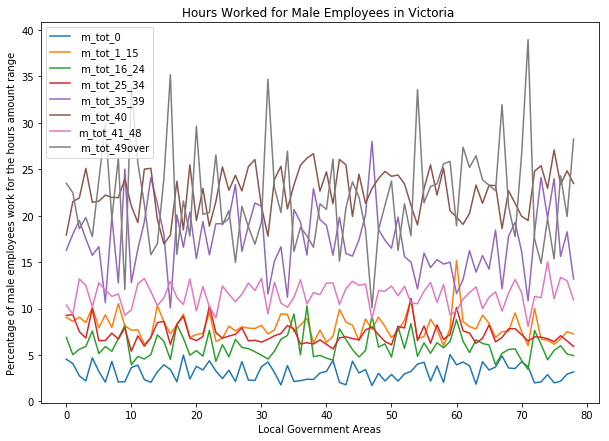

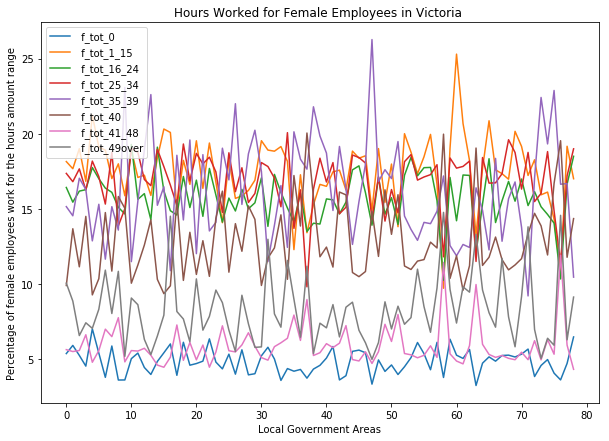

In [11]:
#plots of different ranges of hours worked distribution in Victoria

hours_df[male_hours].plot(figsize = (10,7))
plt.xlabel('Local Government Areas')
plt.ylabel("Percentage of male employees work for the hours amount range")
plt.title('Hours Worked for Male Employees in Victoria ')

hours_df[female_hours].plot(figsize = (10,7))
plt.xlabel('Local Government Areas')
plt.ylabel("Percentage of female employees work for the hours amount range")
plt.title('Hours Worked for Female Employees in Victoria ')

plt.show()

## the male section

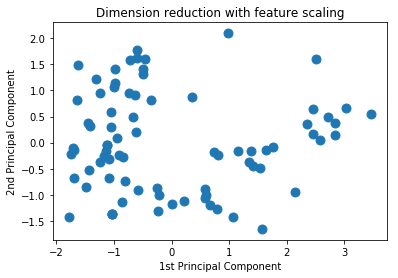

In [12]:
#Dimension reduction with feature scaling for male health risk factors

health_risk_df['m_tot_49over'] = hours_df[' m_tot_49over']

m_health_data = [' ovrwgt_m_2_asr',  ' obese_m_2_asr',' smkrs_m_2_asr']

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(health_risk_df[m_health_data])
#reduce to 2 dimensions
sklearn_pca = PCA(n_components=2)
X_reduced = sklearn_pca.fit_transform(X_scaled)

plt.scatter(X_reduced[:,0],X_reduced[:,1],s=80) 
plt.title('Dimension reduction with feature scaling')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

plt.show()

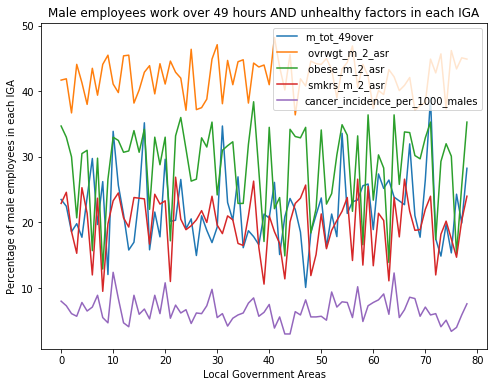

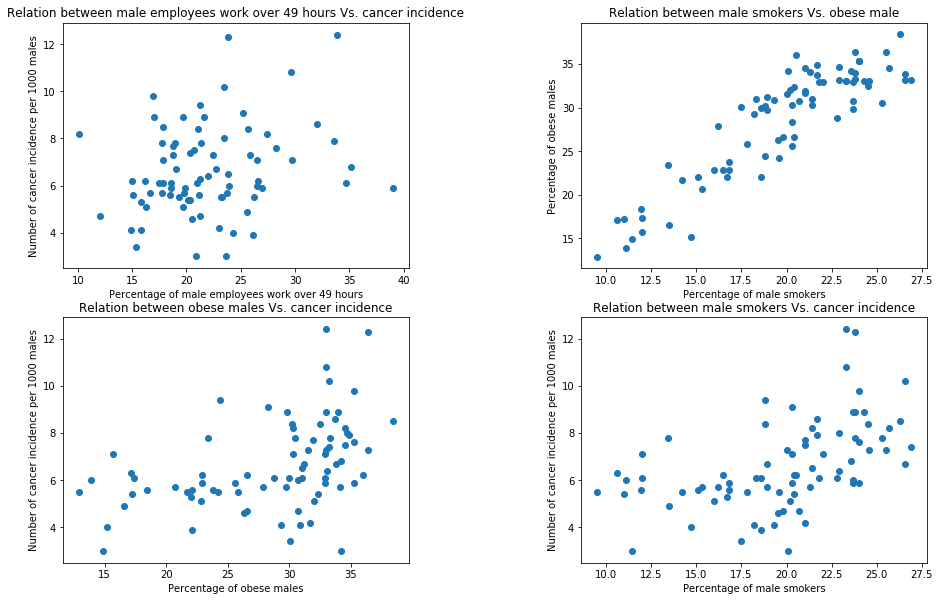

In [13]:
#combine the health risk factors, overworking percentage and cancer incidence into one dataframe for male
male_overwork_df = pd.DataFrame(hours_df[' m_tot_49over'].values, index=hours_df.index, columns=['m_tot_49over'])
male_overwork_df[m_health_data] = health_risk_df[m_health_data]
male_overwork_df['cancer_incidence_per_1000_males'] = profile_df['cancer_incidence_per_1000_males']

#the overall distribution of columns for male data
male_overwork_df[['m_tot_49over',' ovrwgt_m_2_asr', ' obese_m_2_asr',' smkrs_m_2_asr', 'cancer_incidence_per_1000_males']].plot(figsize=(8,6))
plt.xlabel("Local Government Areas")
plt.ylabel('Percentage of male employees in each IGA')
plt.title("Male employees work over 49 hours AND unhealthy factors in each IGA")
plt.show()

#the trend/relation between every two attributes

plt.subplot(221)
plt.scatter(male_overwork_df['m_tot_49over'], male_overwork_df['cancer_incidence_per_1000_males'])
plt.xlabel("Percentage of male employees work over 49 hours")
plt.ylabel("Number of cancer incidence per 1000 males")
plt.title('Relation between male employees work over 49 hours Vs. cancer incidence')

plt.subplot(222)
plt.scatter(male_overwork_df[' smkrs_m_2_asr'], male_overwork_df[' obese_m_2_asr'])
plt.xlabel("Percentage of male smokers")
plt.ylabel("Percentage of obese males")
plt.title("Relation between male smokers Vs. obese male")

plt.subplot(223)
plt.scatter(male_overwork_df[' obese_m_2_asr'], male_overwork_df['cancer_incidence_per_1000_males'])
plt.xlabel("Percentage of obese males")
plt.ylabel("Number of cancer incidence per 1000 males")
plt.title("Relation between obese males Vs. cancer incidence")

plt.subplot(224)
plt.scatter(male_overwork_df[' smkrs_m_2_asr'], male_overwork_df['cancer_incidence_per_1000_males'])
plt.xlabel("Percentage of male smokers")
plt.ylabel("Number of cancer incidence per 1000 males")
plt.title("Relation between male smokers Vs. cancer incidence")

plt.subplots_adjust(left=1, right=3, wspace=0.5, top=2)
plt.show()

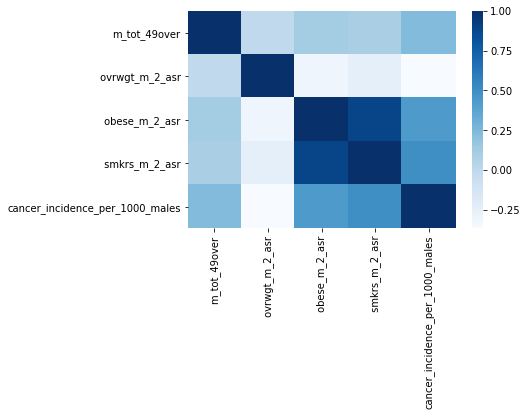

In [14]:
#the heatmap of correlation coefficients for male data
m_cor = male_overwork_df.corr()
m_columns = ['m_tot_49over',' ovrwgt_m_2_asr', ' obese_m_2_asr',' smkrs_m_2_asr', 'cancer_incidence_per_1000_males']
m_cor_hmap=sns.heatmap(m_cor,xticklabels = m_columns, yticklabels = m_columns, cmap='Blues')
plt.show()

## the female section

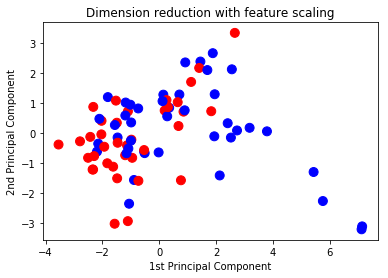

In [15]:
#Dimension reduction with feature scaling for female health risk factors

hours_df[' cancer_incidence_per_1000_females'] = profile_df[' cancer_incidence_per_1000_females']

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hours_df[female_hours])
#reduce to 2 dimensions
sklearn_pca = PCA(n_components=2)
X_reduced = sklearn_pca.fit_transform(X_scaled)

#red dots represent LGAs with relatively larger count of female cancer incidence, blue represent LGAs wtih smaller ones
colors = np.where(hours_df[' cancer_incidence_per_1000_females']>np.mean(hours_df[' cancer_incidence_per_1000_females']),'r','b')

plt.scatter(X_reduced[:,0],X_reduced[:,1],s=80, c = colors) 
plt.title('Dimension reduction with feature scaling')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

plt.show()

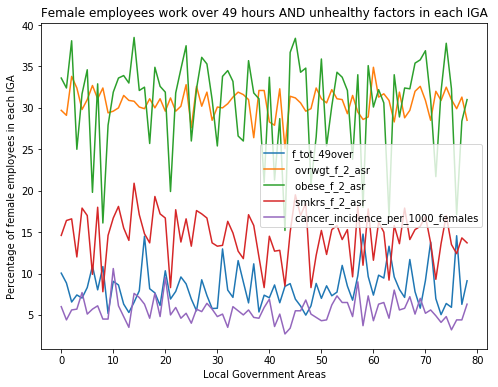

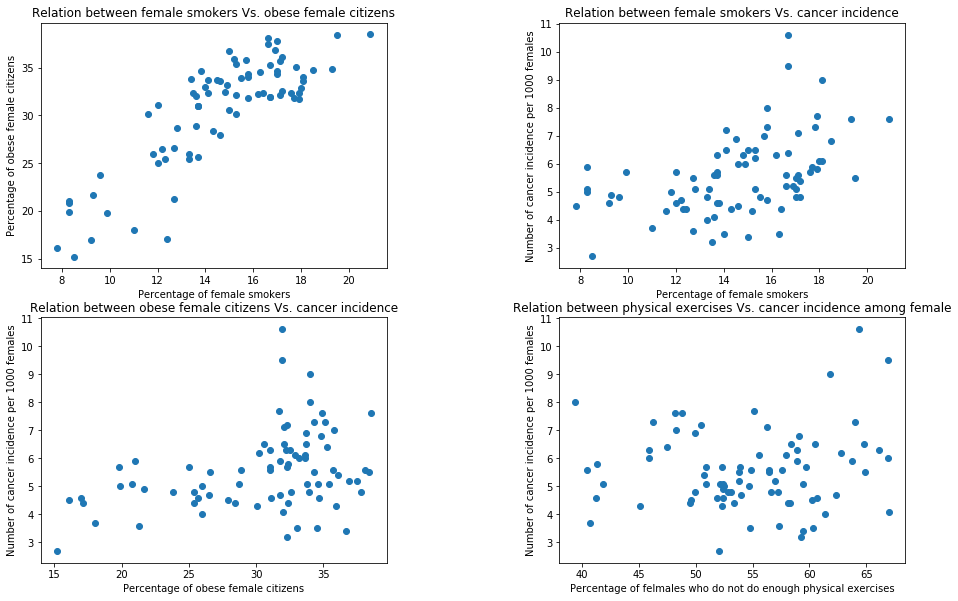

In [20]:
#combine the health risk factors, overworking percentage and cancer incidence into one dataframe for female
female_overwork_df = pd.DataFrame(hours_df[' f_tot_49over'].values, index=hours_df.index, columns=['f_tot_49over'])

f_health_data = [' smkrs_f_2_asr', ' obese_f_2_asr', ' ovrwgt_f_2_asr' ]
female_overwork_df[f_health_data] = health_risk_df[f_health_data]

f_prof_data = [' cancer_incidence_per_1000_females',' females_reporting_being_obese_perc',' females_not_meet_phys_activity_glines_perc']
female_overwork_df[f_prof_data] = profile_df[f_prof_data]

#the overall distribution of columns for female data
female_overwork_df[['f_tot_49over',' ovrwgt_f_2_asr',  ' obese_f_2_asr',' smkrs_f_2_asr', ' cancer_incidence_per_1000_females']].plot(figsize=(8,6))
plt.xlabel("Local Government Areas")
plt.ylabel('Percentage of female employees in each IGA')
plt.title("Female employees work over 49 hours AND unhealthy factors in each IGA")
plt.show()

#the trend/relation between every two attributes

plt.subplot(221)
plt.scatter(female_overwork_df[' smkrs_f_2_asr'], female_overwork_df[' obese_f_2_asr'])
plt.xlabel("Percentage of female smokers")
plt.ylabel("Percentage of obese female citizens")
plt.title("Relation between female smokers Vs. obese female citizens")

plt.subplot(222)
plt.scatter(female_overwork_df[' smkrs_f_2_asr'], female_overwork_df[' cancer_incidence_per_1000_females'])
plt.xlabel("Percentage of female smokers")
plt.ylabel("Number of cancer incidence per 1000 females")
plt.title("Relation between female smokers Vs. cancer incidence")

plt.subplot(223)
plt.scatter(female_overwork_df[' obese_f_2_asr'], female_overwork_df[' cancer_incidence_per_1000_females'])
plt.xlabel("Percentage of obese female citizens")
plt.ylabel("Number of cancer incidence per 1000 females")
plt.title("Relation between obese female citizens Vs. cancer incidence")

#Since the occurance of overworking females is too little, not take into consideration
#replace the factor with not meeting physical activity guidelines
plt.subplot(224)
plt.scatter(female_overwork_df[' females_not_meet_phys_activity_glines_perc'], female_overwork_df[' cancer_incidence_per_1000_females'])
plt.xlabel("Percentage of felmales who do not do enough physical exercises")
plt.ylabel("Number of cancer incidence per 1000 females")
plt.title("Relation between physical exercises Vs. cancer incidence among female")


plt.subplots_adjust(left=1, right=3, wspace=0.5, top=2)
plt.show()

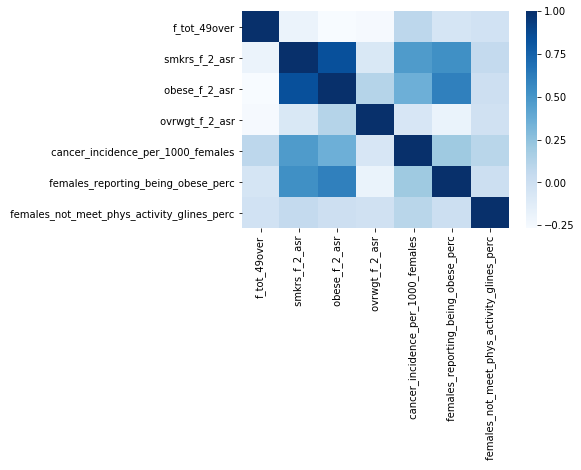

In [17]:
#the heatmap of correlation coefficients for female data
f_cor = female_overwork_df.corr()
f_columns = ['f_tot_49over', ' smkrs_f_2_asr', ' obese_f_2_asr', ' ovrwgt_f_2_asr', 
             ' cancer_incidence_per_1000_females',' females_reporting_being_obese_perc',' females_not_meet_phys_activity_glines_perc']
f_cor_hmap=sns.heatmap(f_cor,xticklabels = f_columns, yticklabels = f_columns, cmap='Blues')
plt.show()

In [18]:
#test for the accuracy of cancer incidence prediction with the model

data = female_overwork_df[['f_tot_49over', ' smkrs_f_2_asr', ' obese_f_2_asr', ' ovrwgt_f_2_asr', ' females_reporting_being_obese_perc',' females_not_meet_phys_activity_glines_perc']]
female_overwork_df[' cancer_incidence_per_1000_females'] = female_overwork_df[' cancer_incidence_per_1000_females']>5
classlabel = female_overwork_df[' cancer_incidence_per_1000_females']
X_train, X_test, y_train, y_test = train_test_split(data, classlabel, train_size=0.8, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_train)
y_pred2 = knn.predict(X_test)

print('Female cancer incidence greater than 0.5% in LGAs prediction using K-NN')
print('Train accuracy:',"%.2f" % (accuracy_score(y_train, y_pred1)*100), '%')
print('Test accuracy:', "%.2f" % (accuracy_score(y_test, y_pred2)*100), '%')

Female cancer incidence greater than 0.5% in LGAs prediction using K-NN
Train accuracy: 79.37 %
Test accuracy: 68.75 %


## The relation between overworking, risky alchhol consumption and cancer incidence overall population in Victoria

                                 cancer_incidence_per_1000_pop  \
 cancer_incidence_per_1000_pop                        1.000000   
risky_alco_per_100                                    0.564316   
p_tot_49_over                                         0.235386   

                                risky_alco_per_100  p_tot_49_over  
 cancer_incidence_per_1000_pop            0.564316       0.235386  
risky_alco_per_100                        1.000000       0.453219  
p_tot_49_over                             0.453219       1.000000  


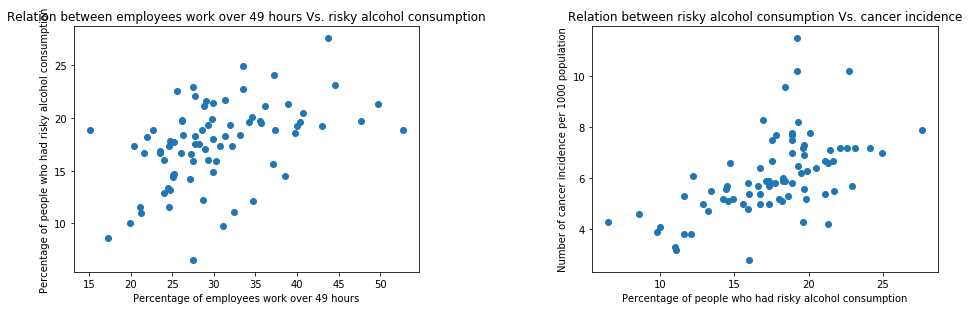

In [19]:
#investigate the relation between overworking, risky alchhol consumption and cancer incidence overall population in Victoria

alco_df = profile_df.loc[:, [' cancer_incidence_per_1000_pop']] #cancer incidence of per 1000 population in Victoria
alco_df['risky_alco_per_100'] = health_risk_df.loc[:,['alchl_p_2_asr']] #Estimated number of people who had risky alcohol consumption per 100 population
#calculate the percentage of people who work more than 49 hours per week in Victoria
alco_df['p_tot_49_over'] = female_overwork_df['f_tot_49over'] + male_overwork_df['m_tot_49over'] 

#the correlation coefficients between each attribute
a_cor = alco_df.corr()
print(a_cor)

#the trend/relation between every two attributes
plt.subplot(221)
plt.scatter(alco_df['p_tot_49_over'], alco_df['risky_alco_per_100'])
plt.xlabel("Percentage of employees work over 49 hours")
plt.ylabel("Percentage of people who had risky alcohol consumption")
plt.title('Relation between employees work over 49 hours Vs. risky alcohol consumption')

plt.subplot(222)
plt.scatter(alco_df['risky_alco_per_100'], alco_df[' cancer_incidence_per_1000_pop'])
plt.xlabel("Percentage of people who had risky alcohol consumption")
plt.ylabel("Number of cancer incidence per 1000 population")
plt.title("Relation between risky alcohol consumption Vs. cancer incidence")

plt.subplots_adjust(left=1, right=3, wspace=0.5, top=2)
plt.show()